In [2]:
import numpy as np
from collections import Counter
import cProfile
import pstats
import io

def mode_using_counter(n_integers):
    random_integers = np.random.randint(1,100_000,n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

# Criando uma função para exibir o perfilamento
def profile_function():
    pr = cProfile.Profile()
    pr.enable()
    mode_using_counter(10_000_000)
    pr.disable()
    # Criando um buffer para armazenar os resultados
    s = io.StringIO()
    ps = pstats.Stats(pr, stream=s).sort_stats(pstats.SortKey.TIME)
    ps.print_stats()
    # Exibindo os resultados
    print(s.getvalue())

In [3]:
# Executando a análise de perfilamento
profile_function()

         3781 function calls (3652 primitive calls) in 1.721 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.384    1.384    1.384    1.384 {built-in method _collections._count_elements}
        9    0.275    0.031    0.275    0.031 {built-in method _imp.create_dynamic}
      9/6    0.019    0.002    0.107    0.018 {built-in method _imp.exec_dynamic}
        3    0.014    0.005    0.019    0.006 <frozen importlib._bootstrap_external>:1214(get_data)
       41    0.007    0.000    0.007    0.000 {built-in method nt.stat}
        3    0.003    0.001    0.003    0.001 {built-in method _io.open_code}
        3    0.002    0.001    0.002    0.001 {method 'read' of '_io.BufferedReader' objects}
        9    0.002    0.000    0.002    0.000 {built-in method builtins.max}
        1    0.001    0.001    0.003    0.003 {method 'run' of '_contextvars.Context' objects}
       75    0.001    0.000    0.001    0.000 <frozen

In [4]:
 !pip install snakeviz
 !pip install flask
 !pip install pyngrok

In [5]:
from pyngrok import ngrok
import time
import numpy as np
from collections import Counter
import cProfile

In [6]:
def mode_using_counter(n_integers):
    random_integers = np.random.randint(1,100_000,n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

In [7]:
profile_filename="profile_results.prof"
cProfile.run("mode_using_counter(100000)", profile_filename)

In [ ]:
import subprocess
import time
print("Iniciando o servidor SnakeViz...")
server_process = subprocess.Popen(["snakeviz", "profile_results.prof", "--server", "--port", "8050"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(600)
print("Servidor SnakeViz rodando na porta 8050!")

Iniciando o servidor SnakeViz...


In [ ]:
print("Iniciando autenticação Ngrok")
!ngrok authtoken "TOKEN"
print("Matando conexões antigas")
ngrok.kill()
try:
    print("Tentando abrir o túnel")
    public_url = ngrok.connect(8050)
    print("Túnel criado com sucesso")
    time.sleep(3)
    snakeviz_path = "/snakeviz/%2Fcontent%2Fprofile_results.prof"
    full_url = public_url.public_url + snakeviz_path
    print("Acesse SnakeViz em:", full_url)
except Exception as e:
    print("Erro ao iniciar Ngrok:", e)

In [1]:
import numpy as np
from collections import Counter
import psutil
import os

def mode_using_counter(n_integers):
    """Gera números aleatórios e retorna o mais frequente"""
    process = psutil.Process(os.getpid())  # Obter o processo atual
    mem_before = process.memory_info().rss / 1024 ** 2  # Memória antes (MB)
    random_integers = np.random.randint(1, 100_000, n_integers)
    c = Counter(random_integers)
    result = c.most_common(1)[0][0]
    mem_after = process.memory_info().rss / 1024 ** 2  # Memória depois (MB)
    print(f" Memória antes: {mem_before:.2f} MB")
    print(f" Memória depois: {mem_after:.2f} MB")
    print(f" Diferença de memória: {mem_after - mem_before:.2f} MB")
    return result

mode_using_counter(100_000)

 Memória antes: 75.95 MB
 Memória depois: 83.81 MB
 Diferença de memória: 7.86 MB


np.int32(51139)

In [3]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.9 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 4.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 4.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.2 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 5.3 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.3 MB/s eta 0:00:00
   -----------------------

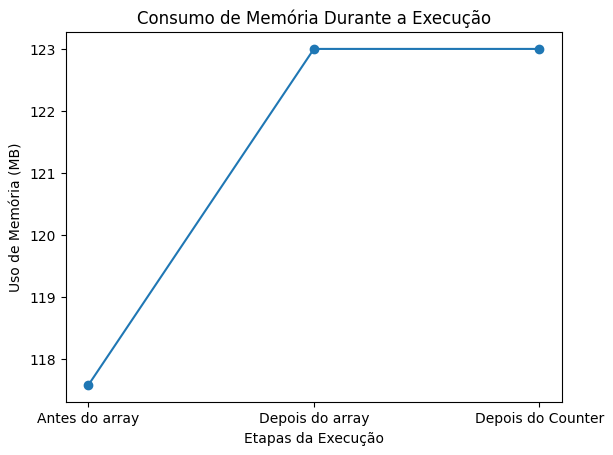

In [4]:
import matplotlib.pyplot as plt

memory_usage = [117.5859375, 123.0, 123.0]
steps = ["Antes do array", "Depois do array", "Depois do Counter"]
plt.plot(steps, memory_usage, marker="o",
linestyle="-")
plt.xlabel("Etapas da Execução")
plt.ylabel("Uso de Memória (MB)")
plt.title("Consumo de Memória Durante a Execução")
plt.show()